# GIẢI THUẬT 2: SUPPORT VECTOR MACHINE (SVM)

## Nhiệm vụ 1: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu là hình ảnh

#### 1. Import thư viện và tải dữ liệu là tập các hình ảnh viết tay từ số 0 đến số 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

#### 2. Khảo sát thông tin có trong digits

In [2]:
#thông tin toàn bộ dữ liệu đã tải về
digits
#xem thông tin của một hình dưới dạng ma trận 8 x 8
digits['data'][0].reshape(8,8)
#xem thông tin của một hình dưới dạng mảng
digits['data'][0]
#xem thông tin 9 nhãn đầu tiên
digits['target'][0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

#### 3. Vẽ ra hình dựa vào dữ liệu dạng ma trận 8 x 8

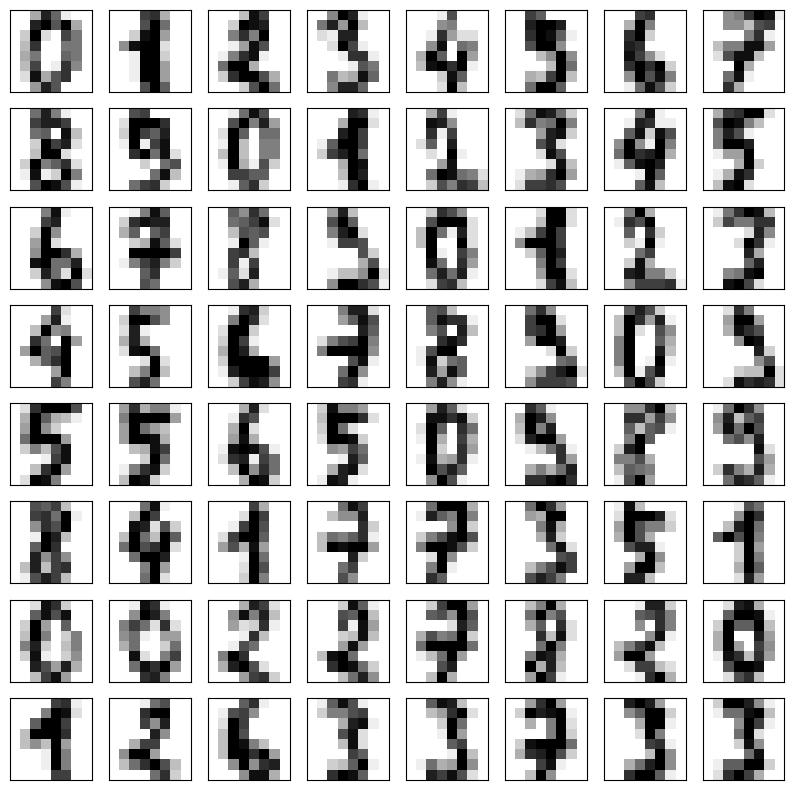

In [5]:
# Each Digit is represented in digits.images as a matrix of 8x8 = 64 pixels. Each of the 64 values represent
# a greyscale. The Greyscale are then plotted in the right scale by the imshow method.
fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

#### 4. Vẽ một ảnh từ ma trận 8 x 8

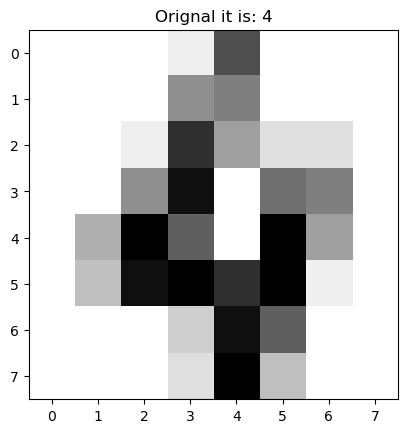

In [6]:
# Hàm vẽ 1 ảnh có kích thước 8 x 8 (ảnh lấy từ ma images)
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()
# vẽ ảnh ở vị trí thứ 4
view_digit(4)

## Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9

#### 1. Chuẩn bị dữ liệu và xây dựng mô hình SVM

In [7]:
# Thực hiện import các thư viện cần thiết để xây dựng mô hình SVM
# Thực hiện bước 1 của nhiệm vụ 1
from sklearn import svm
main_data = digits['data']
targets = digits['target']
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500])
predictions = svc.predict(main_data[1501:])
# list(zip(predictions , targets[1501:]))

#### 2. Đánh giá hiệu quả của mô hình với Confusion Matrix

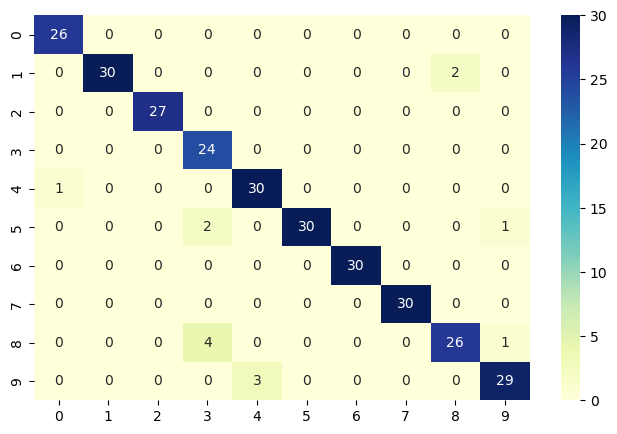

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(predictions, targets[1501:])
conf_matrix = pd.DataFrame(data = cm)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

#### 3. In kết quả dạng văn bản

In [9]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296

